In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Define the sensors and input folder
# sensors = ['2P02', '2T01', '2T02', '2T03', '2T04']
# input_folder = '../Data_target/projectroom/'
# 
# # Initialize an empty list to store DataFrames
# dfs = []
# 
# # Loop through each sensor
# for sensor in sensors:
#     # Read the Excel file
#     df = pd.read_excel(f'{input_folder}{sensor}_processed.xlsx')
#     
#     # Ensure the 'Date' column is in datetime format
#     df['Date'] = pd.to_datetime(df['Date'])
#     
#     # Align 'Date' to the nearest 5-minute interval
#     df['Date'] = df['Date'].dt.floor('5T')
#     
#     # Rename the 'Count' column to include the sensor name
#     df = df.rename(columns={'Count': f'Count_{sensor}'})
#     
#     # Append the DataFrame to the list
#     dfs.append(df)
# 
# # Merge all DataFrames on the 'Date' column
# merged_df = dfs[0]
# for df in dfs[1:]:
#     merged_df = pd.merge(merged_df, df, on='Date', how='outer')
# 
# # Sort by Date
# merged_df = merged_df.sort_values('Date').reset_index(drop=True)
# 
# # Fill missing values with NaN
# merged_df = merged_df.fillna(np.nan)
# t_sensor_columns = [f'Count_{sensor}' for sensor in sensors if sensor.startswith('2T')]
# 
# # Add the 'occupancy' column
# merged_df['occupancy'] = (merged_df[t_sensor_columns].notna() & (merged_df[t_sensor_columns] != 0)).sum(axis=1)
# 
# # Save the merged DataFrame to a new Excel file
# output_file = '../Data_target/projectroom/merged_sensors_data.xlsx'
# merged_df.to_excel(output_file, index=False)
# 
# print(f'Merged data saved to {output_file}')


In [2]:
df = pd.read_excel('../Data_target/projectroom/merged_sensors_data.xlsx')

In [3]:
df['occupancy'].value_counts()
df = df[(df['Date'] >= '2024-06-15') & (df['Date'] < '2024-06-16')]


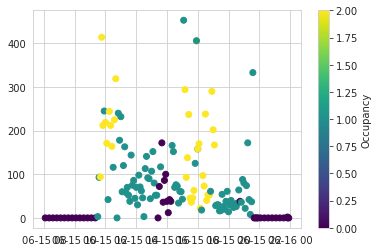

In [4]:
sc = plt.scatter(df['Date'], df['Count_2P02'], c=df['occupancy'], cmap='viridis')
plt.colorbar(sc, label='Occupancy')

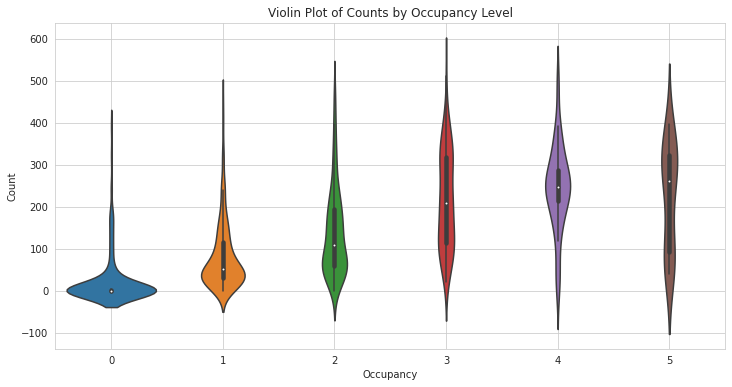

In [5]:
import seaborn as sns
df = pd.read_excel('../Data_target/merged_sensors_data_modified.xlsx')
plt.figure(figsize=(12, 6))
sns.violinplot(x='occupancy', y='Count_2P02', data=df)
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.title('Violin Plot of Counts by Occupancy Level')
plt.grid(True)
plt.show()

In [6]:
df = pd.read_excel('../Data_target/merged_sensors_data_modified.xlsx')
df = df[df['Count_2P02'].notna()]   
X = df[['Count_2P02']]
y = df['occupancy']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(919, 1) (919,)
(735, 1) (184, 1) (735,) (184,)


In [7]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.9223019688067744
R^2 Score: 0.34233123157770484


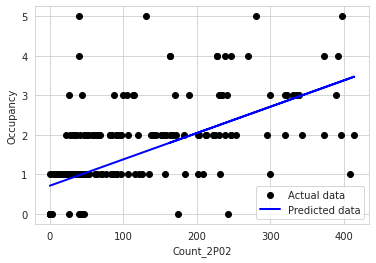

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted data')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

In [9]:

new_count = pd.DataFrame({'Count_2P02': [150]})
predicted_occupancy = model.predict(new_count)
print(f'Predicted occupancy for count 150: {predicted_occupancy[0]}')


Predicted occupancy for count 150: 1.7145994906857989


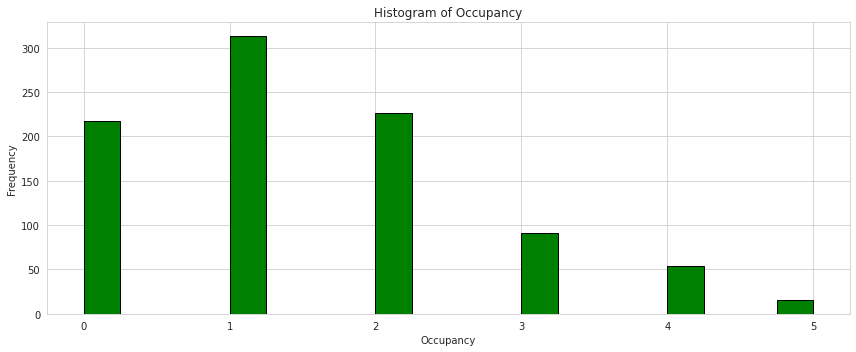

In [10]:

plt.figure(figsize=(12, 5))

plt.hist(df['occupancy'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


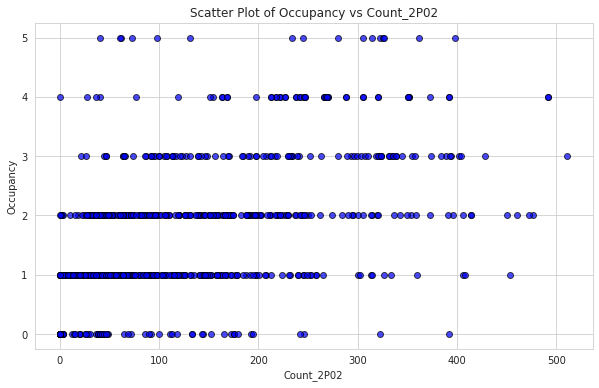

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Count_2P02'], df['occupancy'], color='blue', edgecolor='black', alpha=0.7)
plt.title('Scatter Plot of Occupancy vs Count_2P02')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.grid(True)
plt.show()

In [12]:
for x in df['occupancy'].unique():
    df_temp = df[df['occupancy'] == x]
    mean = df_temp['Count_2P02'].mean()
    std = df_temp['Count_2P02'].std()
    print(f'Count {x} has a mean of{mean} and a standard deviation of {std}, meaning this is the range {mean - std} to {mean + std}.')


Count 0 has a mean of22.256880733944953 and a standard deviation of 57.09171272710903, meaning this is the range -34.83483199316407 to 79.34859346105398.
Count 1 has a mean of81.51757188498402 and a standard deviation of 79.0978004117864, meaning this is the range 2.4197714731976276 to 160.61537229677043.
Count 2 has a mean of139.04845814977975 and a standard deviation of 104.0307235711029, meaning this is the range 35.01773457867685 to 243.07918172088264.
Count 3 has a mean of214.72527472527472 and a standard deviation of 113.55841041645738, meaning this is the range 101.16686430881734 to 328.2836851417321.
Count 5 has a mean of223.4375 and a standard deviation of 124.41434469813626, meaning this is the range 99.02315530186374 to 347.85184469813623.
Count 4 has a mean of244.85185185185185 and a standard deviation of 101.11331349687468, meaning this is the range 143.73853835497715 to 345.96516534872654.


Count 0 has a mean of 22.256880733944953 and a standard deviation of 57.09171272710903, meaning this is the range -34.83483199316407 to 79.34859346105398.
Count 1 has a mean of 81.51757188498402 and a standard deviation of 79.0978004117864, meaning this is the range 2.4197714731976276 to 160.61537229677043.
Count 2 has a mean of 139.04845814977975 and a standard deviation of 104.0307235711029, meaning this is the range 35.01773457867685 to 243.07918172088264.
Count 3 has a mean of 214.72527472527472 and a standard deviation of 113.55841041645738, meaning this is the range 101.16686430881734 to 328.2836851417321.
Count 5 has a mean of 223.4375 and a standard deviation of 124.41434469813626, meaning this is the range 99.02315530186374 to 347.85184469813623.
Count 4 has a mean of 244.85185185185185 and a standard deviation of 101.11331349687468, meaning this is the range 143.73853835497715 to 345.96516534872654.


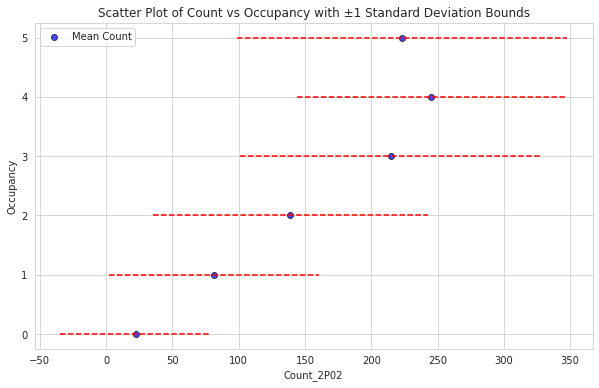

In [13]:
means = []
stds = []
occupancies = df['occupancy'].unique()

for x in occupancies:
    df_temp = df[df['occupancy'] == x]
    mean = df_temp['Count_2P02'].mean()
    std = df_temp['Count_2P02'].std()
    means.append(mean)
    stds.append(std)
    print(f'Count {x} has a mean of {mean} and a standard deviation of {std}, meaning this is the range {mean - std} to {mean + std}.')

stats_df = pd.DataFrame({
    'occupancy': occupancies,
    'mean': means,
    'std': stds
})

stats_df['lower_bound'] = stats_df['mean'] - stats_df['std']
stats_df['upper_bound'] = stats_df['mean'] + stats_df['std']

plt.figure(figsize=(10, 6))

plt.scatter(stats_df['mean'], stats_df['occupancy'], color='blue', edgecolor='black', alpha=0.7, label='Mean Count')

for i in range(len(stats_df)):
    plt.plot([stats_df['lower_bound'][i], stats_df['upper_bound'][i]], [stats_df['occupancy'][i], stats_df['occupancy'][i]], color='red', linestyle='--')

plt.title('Scatter Plot of Count vs Occupancy with ±1 Standard Deviation Bounds')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
filtered_df = pd.DataFrame()

# Filter the original DataFrame based on the bounds for each occupancy
for _, row in stats_df.iterrows():
    occupancy = row['occupancy']
    lower_bound = row['lower_bound']
    upper_bound = row['upper_bound']
    temp_df = df[(df['occupancy'] == occupancy) & (df['Count_2P02'] >= lower_bound) & (df['Count_2P02'] <= upper_bound)]
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)

print(filtered_df)

                   Date  Count_2P02  Count_2T01  Count_2T02  Count_2T03  \
0   2024-06-13 08:10:00         0.0         NaN         NaN         NaN   
1   2024-06-13 08:25:00         0.0         NaN         NaN         NaN   
2   2024-06-13 08:40:00         0.0         NaN         NaN         NaN   
3   2024-06-13 08:45:00         2.0         NaN         NaN         NaN   
4   2024-06-13 08:50:00        20.0         NaN         NaN         NaN   
..                  ...         ...         ...         ...         ...   
729 2024-06-12 12:27:10       213.0         NaN         NaN         NaN   
730 2024-06-12 12:57:08       305.0         NaN         NaN         NaN   
731 2024-06-12 13:22:08       163.0         NaN         NaN         NaN   
732 2024-06-12 13:27:08       247.0         NaN         NaN         NaN   
733 2024-06-12 13:32:08       168.0         NaN         NaN         NaN   

     Count_2T04  occupancy  
0           NaN          0  
1           NaN          0  
2           

Mean Squared Error: 0.39847212699330337
Model Coefficients: [0.0117942]
Model Intercept: 0.38066369455496696


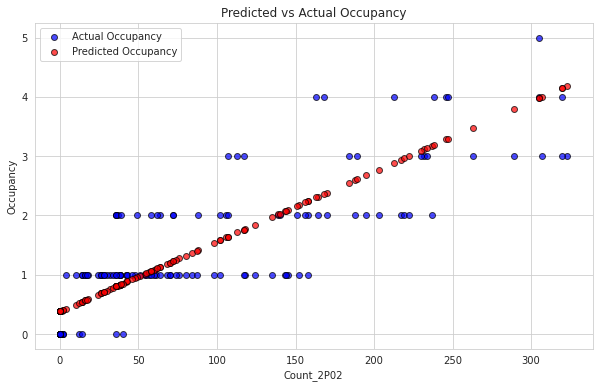

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target vector
X_filtered = filtered_df[['Count_2P02']]
y_filtered = filtered_df['occupancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the model coefficients
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', edgecolor='black', alpha=0.7, label='Actual Occupancy')
plt.scatter(X_test, y_pred, color='red', edgecolor='black', alpha=0.7, label='Predicted Occupancy')
plt.title('Predicted vs Actual Occupancy')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 0.33253106547524564


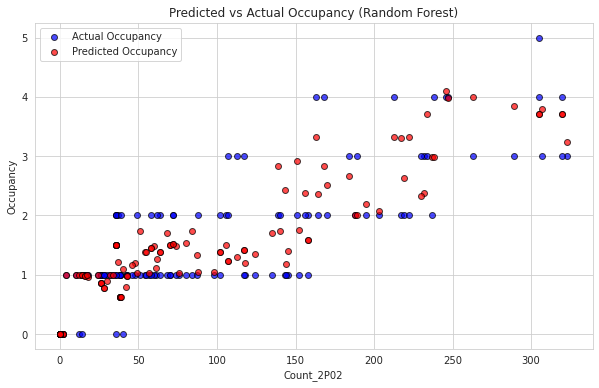

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target vector
X_filtered = filtered_df[['Count_2P02']]
y_filtered = filtered_df['occupancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', edgecolor='black', alpha=0.7, label='Actual Occupancy')
plt.scatter(X_test, y_pred, color='red', edgecolor='black', alpha=0.7, label='Predicted Occupancy')
plt.title('Predicted vs Actual Occupancy (Random Forest)')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()

Custom Accuracy (Mean Absolute Error): 0.36054421768707484


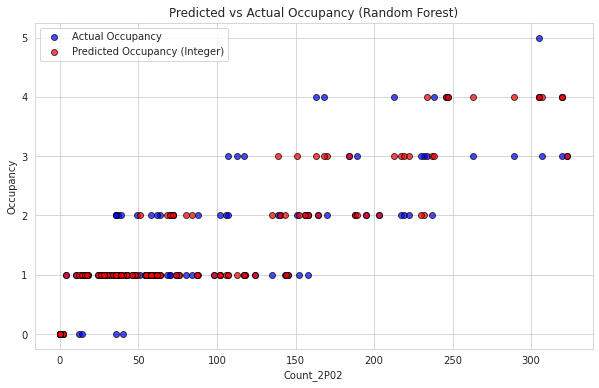

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_filtered = filtered_df[['Count_2P02']]
y_filtered = filtered_df['occupancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Initialize the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to integers
y_pred_int = np.round(y_pred).astype(int)

# Custom accuracy metric (mean absolute error)
accuracy = np.mean(np.abs(y_pred_int - y_test))

print(f'Custom Accuracy (Mean Absolute Error): {accuracy}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', edgecolor='black', alpha=0.7, label='Actual Occupancy')
plt.scatter(X_test, y_pred_int, color='red', edgecolor='black', alpha=0.7, label='Predicted Occupancy (Integer)')
plt.title('Predicted vs Actual Occupancy (Random Forest)')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# df = pd.read_excel('../Data_target/merged_sensors_data_modified.xlsx')
filtered_df['occupancy_category'] = filtered_df['occupancy'].apply(lambda x: 0 if x <= 2 else 1)

In [19]:
filtered_df['occupancy_category'].unique()
filtered_df.dropna(subset=['Count_2P02'], inplace=True)

Accuracy: 0.9183673469387755
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.75      0.68      0.71        22

    accuracy                           0.92       147
   macro avg       0.85      0.82      0.83       147
weighted avg       0.92      0.92      0.92       147



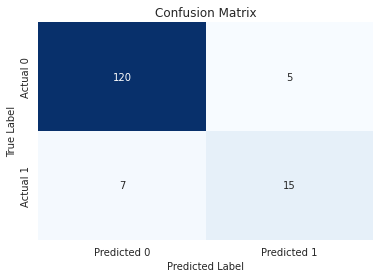

In [20]:
X = filtered_df[['Count_2P02']]
y = filtered_df['occupancy_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_excel('../Data_target/merged_sensors_data_modified.xlsx')
filtered_df['occupancy_category'] = df['occupancy'].apply(lambda x: 0 if x <= 2 else 1)
filtered_df = filtered_df[['Count_2P02', 'occupancy_category']]
filtered_df.info()

shuffled_df = filtered_df.sample(frac=1).reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Count_2P02          734 non-null    float64
 1   occupancy_category  734 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [22]:
cutoff = int(.9 * len(shuffled_df))
X_train, X_test, y_train, y_test = shuffled_df['Count_2P02'][:cutoff], shuffled_df['Count_2P02'][cutoff:], shuffled_df['occupancy_category'][:cutoff], shuffled_df['occupancy_category'][cutoff:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train[0]

(660,) (74,) (660,) (74,)


0

In [23]:
train_data = pd.concat([X_train, y_train], axis=1)

In [24]:
filtered_train = pd.DataFrame()
for category in train_data['occupancy_category'].unique():
    category_data = train_data[train_data['occupancy_category'] == category]
    mean = category_data['Count_2P02'].mean()
    std = category_data['Count_2P02'].std()
    lower_bound = mean - std
    upper_bound = mean + std
    
    temp_df = category_data[(category_data['Count_2P02'] >= lower_bound) & (category_data['Count_2P02'] <= upper_bound)]
    filtered_train = pd.concat([filtered_train, temp_df])

# filtered_train.info()
X_train, y_train = train_data['Count_2P02'], train_data['occupancy_category']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(660,) (74,) (660,) (74,)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and y_train are p

# Reshape X_train if it's 1D
if X_train.ndim == 1:
    X_train = X_train

# Create the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[171.  46.  40. 129.  44.  57.  58.  45. 106. 104. 213.  62.  18.  20.
  14.  95. 156.  16. 152.   0.  68.  13. 299.  58.   0.  32.  72. 163.
   2.  46.  98. 307.  52.  36.  97.  52.  32.  42. 170.  85.  14.  88.
   0.   0. 116.  61.  28.   1. 174.  91.   0.   0.  93.  87.   0.   0.
  82. 131.  26.   0. 150. 288.   0.   0. 230.  38.  28.   0.  44.   0.
 198. 118.  51.  95.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.